<a href="https://colab.research.google.com/github/xinnazim/esaa/blob/main/%ED%86%B5%ED%94%84hw5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2031031 유지민 통프 HW5

## Exercise 2.3.4 Revisiting Iris data (HW)

We use `train_loader` to train the model, and use `test_loader` to calculate the test accuracy. Use the following code to train the model, and calculate the test accuracy. In this case, you need to define your own loss function to calculate cross-entropy function from `q_hat` and `tt`.
```
z_model = nn.Linear(784, 10, bias=True)
```
and
```
for xx, tt in train_loader:
  zhat = z_model(xx)
  q_hat = torch.softmax()
```

In [ ]:
# import library

import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
import sklearn.datasets
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, TensorDataset
import pandas as pd
from tqdm import tqdm

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = load_iris()

# Convert the data to PyTorch tensors
X = torch.tensor(iris.data, dtype=torch.float32)
y = torch.tensor(iris.target, dtype=torch.long)

t = torch.nn.functional.one_hot(torch.tensor(y, dtype=torch.int64), num_classes=3) #원핫인코딩
t = torch.tensor(t, dtype=torch.float32)


# Normalize the input data
mean = torch.mean(X, dim=0)
std = torch.std(X, dim=0)
X = (X - mean) / std

# Split the dataset into training and validation sets
X_train, X_val, t_train, t_val = train_test_split(X, t, test_size=0.2, random_state=42)

# Create PyTorch Datasets
train_dataset = TensorDataset(X_train, t_train)
val_dataset = TensorDataset(X_val, t_val)

# Define the data loaders
batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

<ipython-input-2-a18e89a69626>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t = torch.nn.functional.one_hot(torch.tensor(y, dtype=torch.int64), num_classes=3) #원핫인코딩
<ipython-input-2-a18e89a69626>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t = torch.tensor(t, dtype=torch.float32)


X: 설명변수
y: 클래스 값
t: y의 원핫인코딩

In [ ]:
X[:1]

tensor([[-0.8977,  1.0156, -1.3358, -1.3111]])

In [ ]:
y[:1]

tensor([0])

1. 모델링, 훈련

100%|██████████| 200/200 [00:04<00:00, 49.27it/s]


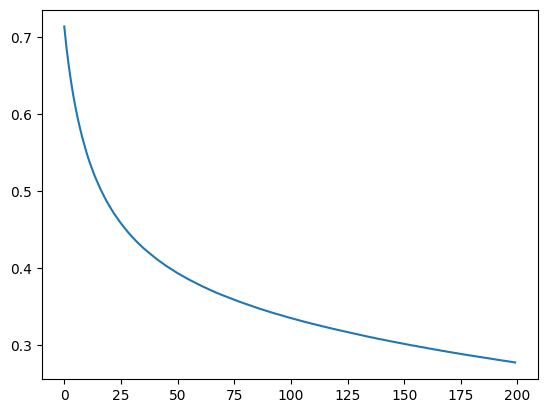

In [ ]:
# 모델 정의
z_model = nn.Linear(4, 3, bias=True) # 4개의 입력 특성, 3개의 클래스를 갖는 선형 모델

# 옵티마이저 설정
optimizer = torch.optim.SGD(z_model.parameters(), lr=0.01)

#loss ftn 정의
def loss_ftn(qhat, tt):
  loss = - torch.mean(torch.sum(tt * torch.log(qhat), axis=1))
  return loss


n=X_train.shape[0]
history=[]
epochs = 200

for epoch in tqdm(range(epochs)):
    Loss = 0
    for xx, tt in train_loader:
        zhat = z_model(xx)
        qhat = torch.softmax(zhat, dim=1)

        #loss 계산
        loss = loss_ftn(qhat, tt)
        Loss = Loss + loss.item()*len(xx)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    history.append(Loss/n)

#시각화
plt.plot(history)

2. accuracy 계산

In [ ]:
qhat

tensor([[3.0697e-02, 2.8960e-01, 6.7970e-01],
        [9.8883e-01, 1.0926e-02, 2.4468e-04],
        [1.3980e-01, 5.9367e-01, 2.6653e-01],
        [9.9538e-01, 4.4931e-03, 1.2502e-04],
        [2.1093e-03, 5.9638e-02, 9.3825e-01],
        [9.5650e-03, 8.0613e-01, 1.8431e-01],
        [9.7353e-01, 2.6035e-02, 4.3759e-04],
        [2.0468e-02, 8.9948e-01, 8.0056e-02]], grad_fn=<SoftmaxBackward0>)

In [ ]:
def accuracy_ftn(qhat, t):
  yhat = torch.argmax(qhat, axis=1).to(torch.float32) # argmax 사용해서 열 기준으로 max값 도출(예측)
  y = torch.argmax(t, axis=1).to(torch.float32) # (실제)
  accuracy = torch.sum((y==yhat).to(torch.float32)) #예측과 실제가 일치하는 경우의 수
  return accuracy

acc_sum=0

for X,T in test_loader:
    qhat = torch.softmax(z_model(X), dim=1) #예측 확률
    acc_sum = acc_sum + accuracy_ftn(qhat, T).item() #각 배치의 예측 정확도 누적

# 전체 정확도 출력
print("accuracy:",(acc_sum/len(X_val)))

accuracy: 0.9666666666666667


> accuracy: 약 96%

## Exercise 2.3.5: Fashion MNIST data (HW)

You are given the following fashion MNIST data. Do the multinomial regression so that the regression machine can determine the label from the images. Calculate the test accuracy. In the test dataset, identify at least 5 cases where your predictions are wrong, and explain why possibly they were mis-classified.

> 5 case

1. the picture

2. predicted label

3. real label

4. Explain the possible reason why your model is wrong in this case.

In [ ]:
import torch
from torch import nn, optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
# transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Download and load the training data
trainset = datasets.FashionMNIST('./data', download=True, train=True, transform=transform)
train_loader = DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
validationset = datasets.FashionMNIST('./data', download=True, train=False, transform=transform)
test_loader = DataLoader(validationset, batch_size=64, shuffle=True)

In [ ]:
xx, yy = trainset[0]

In [ ]:
xx.shape

torch.Size([1, 28, 28])

Ankle boot


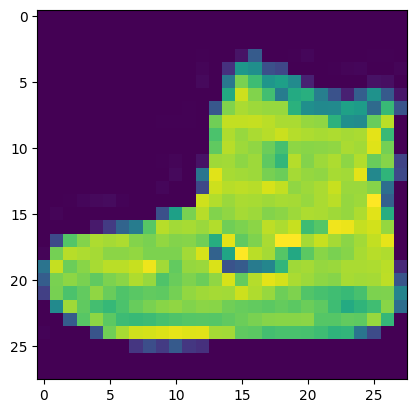

In [ ]:
plt.imshow(xx.reshape(28,28))
my_name = { 0: "T-shirt/top", 1: "Trouser",
              2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}
print(my_name[yy])



1. 모델링
2. 모델링으로 각 class별 확률 구하고 그걸 기준으로 예측값이 분류한 class 라벨 붙임
3. 실제 라벨과 비교

In [ ]:
trainset

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

> trainset 개수= 60000

  0%|          | 0/20 [00:00<?, ?it/s]<ipython-input-14-a385900e32ed>:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t_ = torch.nn.functional.one_hot(torch.tensor(tt, dtype=torch.int64), num_classes=10)
<ipython-input-14-a385900e32ed>:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t_ = torch.tensor(t_, dtype=torch.float32)
100%|██████████| 20/20 [05:34<00:00, 16.72s/it]


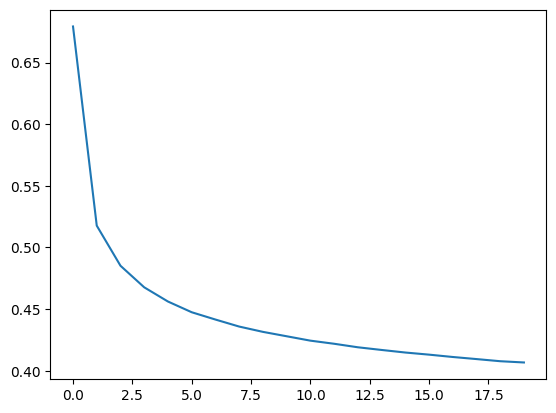

In [ ]:
# 모델링

z_model = nn.Linear(28*28, 10, bias=True) # 입력 크기는 28*28, 출력 클래스는 10개

# loss ftn 정의
def loss_ftn(qhat, tt):
    loss = -torch.mean(torch.sum(tt * torch.log(qhat), axis=1))
    return loss

# 옵티마이저 설정
optimizer = torch.optim.SGD(z_model.parameters(), lr=0.01)

# 훈련
n = 60000
history = []
epochs = 20

for epoch in tqdm(range(epochs)):
    Loss = 0

    # 각 미니배치에 대한 반복
    for xx, tt in train_loader:

        zhat = z_model(xx.reshape([-1, 28*28])) #linear modeld에서 사용하기 위해 784 벡터 꼴로 reshape

        # 소프트맥스 함수를 통해 확률로 변환
        qhat = torch.softmax(zhat, dim=1)

        # 원핫인코딩
        t_ = torch.nn.functional.one_hot(torch.tensor(tt, dtype=torch.int64), num_classes=10)
        t_ = torch.tensor(t_, dtype=torch.float32)

        # loss 계산
        loss = loss_ftn(qhat, t_)
        Loss += loss.item() * len(xx)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    history.append(Loss/n)

# 시각화
plt.plot(history)


class별로 나타낸 Y와 확률을 기반으로 class로 분류된 Yhat이 같아지는 것이 accuracy임
달라지는 것을 mis_pred 로 담아서 그림으로 확인

In [ ]:
# accuracy 확인

# 모델링으로 각 class 별 확률을 기준으로 라벨 생성
for X,Y in test_loader:
  qhat = torch.softmax(z_model(X.reshape([-1,28*28])), dim=1)
  # 확률기반 클래스 분류
  Yhat = torch.argmax(qhat, axis=1).to(torch.float32)

  Y=Y.to(torch.float32)
  acc_sum = acc_sum + torch.sum((Y==Yhat).to(torch.float32))

print("accuracy:",(acc_sum/len(validationset)))

accuracy: tensor(0.8446)


> 약 84%

In [ ]:
#mis data
print(Y!=Yhat,Y[Y!=Yhat])

tensor([False, False, False, False, False, False, False, False, False, False,
        False,  True, False,  True, False, False]) tensor([6., 8.])


> * True-> 오분류
* True 위치에서 예측이 틀렸고 실제 레이블은 각각 6,8 이라는 뜻

다중 클래스 로지스틱 회귀 모델:

Fashion MNIST 데이터셋에 대한 다중 클래스 로지스틱 회귀 모델을 만듭니다. 훈련 후 테스트 데이터셋에서의 정확도를 계산합니다.
틀린 예측 식별:

테스트 데이터셋에서 모델이 틀린 경우를 식별합니다. 이를 위해 예측과 실제 레이블을 비교하여 틀린 경우를 찾습니다.
틀린 경우 설명:

적어도 5개의 틀린 예측에 대해 왜 모델이 틀렸는지 설명합니다. 특히, 이미지의 특징, 모델이 혼란스러워하는 클래스 등을 고려하여 설명합니다.

In [ ]:
mis_samples = [] #오분류된 이미지 데이터 저장 리스트
mis_labels = [] # 모델의 오분류 예측 레이블 저장 리스트
true_labels = [] # 실제 레이블 저장 리스트

# 모든 테스트 데이터에 대해 반복(각 class 별 확률을 기준으로 라벨 생성)
for X, Y in test_loader:
    qhat = torch.softmax(z_model(X.reshape([-1, 28*28])), dim=1)

    # 확률 기반 클래스 분류
    Yhat = torch.argmax(qhat, axis=1).to(torch.float32)
    Y = Y.to(torch.float32)

    # 오분류된 데이터 저장
    mis_samples.append(X[Y != Yhat])
    mis_labels.append(Yhat[Y != Yhat])
    true_labels.append(Y[Y != Yhat])

# 다시 텐서로 변환
mis_samples = torch.cat(mis_samples)
mis_labels = torch.cat(mis_labels)
true_labels = torch.cat(true_labels)

In [ ]:
mis_samples.shape

torch.Size([1583, 1, 28, 28])

> 1594개가 잘못 예측되었다.

Hint: Each training and test example is assigned to one of the following labels:

0 T-shirt/top

1 Trouser 바지

2 Pullover 니트

3 Dress

4 Coat

5 Sandal

6 Shirt

7 Sneaker

8 Bag

9 Ankle boot

1. the picture

2. predicted label

3. real label

4. Explain the possible reason why your model is wrong in this case.

tensor(1.)
tensor(3.)


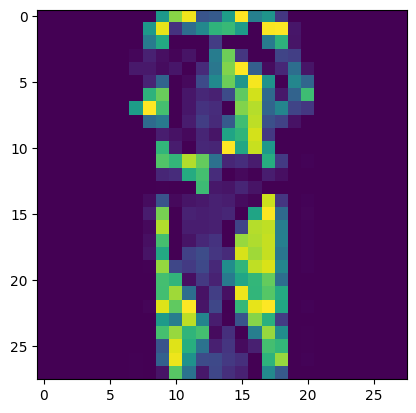

In [ ]:
# 1.
plt.imshow(mis_samples[0].reshape(28,28))
print(mis_labels[0])
print(true_labels[0])

> dress를 Trouser이라고 잘못 예측
* 길이가 비슷해보임

tensor(4.)
tensor(2.)


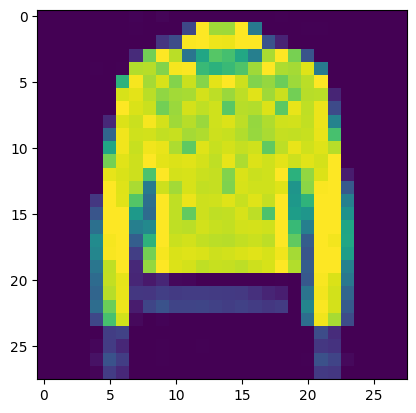

In [ ]:
#2.
plt.imshow(mis_samples[1].reshape(28,28))
print(mis_labels[1])
print(true_labels[1])

> Pullover를 Coat라고 예측
* 길이, 모양이 비슷함

tensor(6.)
tensor(2.)


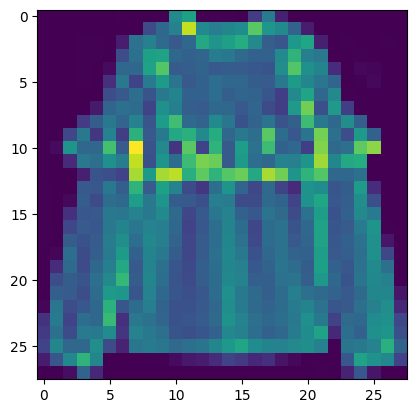

In [ ]:
#3.
plt.imshow(mis_samples[2].reshape(28,28))
print(mis_labels[2])
print(true_labels[2])

> Pullover를 shirt라고 예측
* 길이, 모양이 비슷

tensor(9.)
tensor(5.)


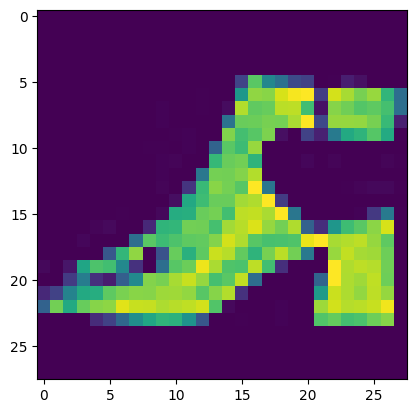

In [ ]:
#4.
plt.imshow(mis_samples[3].reshape(28,28))
print(mis_labels[3])
print(true_labels[3])

> Sandal을 Ankle boots라고 예측함
* 전체적으로 모양이 비슷하고 뚫려있는 부분을 구분 못하면 오분류하기 쉬워보임

tensor(0.)
tensor(8.)


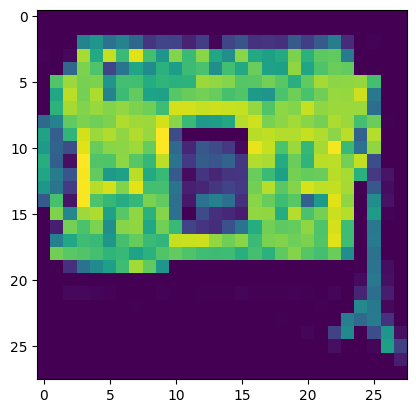

In [ ]:
#5.
i=14
plt.imshow(mis_samples[i].reshape(28,28))
print(mis_labels[i])
print(true_labels[i])

> Bag를 T-shirt/top으로 예측
* 가방의 실루엣이 top과 비슷하고 디테일하게 분석하지 못해서 잘못 분류한 것 같음

> 더 다양한 데이터를 수집하고 복잡한 모델을 통해 유사한 클래스 간의 경계를 학습을 시킨다면, 오분류가 줄어들 것 같다.